## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import STL

## Data Exploration of Data Provided By ExcelR

+ By using this parse_date = ['column containing date'] argument in pd.read_csv() we don't have to use 'pd.to_datetime' to convert our column containing date to date time type by default it will be read as object type

In [2]:
gold_prices_excelR = pd.read_csv(r"C:\radha\GitHub\Gold-Price-Prediction\Gold_data_Excel.csv",parse_dates = ['date'])
gold_prices_excelR.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [3]:
gold_prices_excelR.tail()

,date,price
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [4]:
gold_prices_excelR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


## We will use resampling function later which uses DateTimeIndex, PeriodIndex or TimedeltaIndex.

In [5]:
df = gold_prices_excelR.set_index(pd.DatetimeIndex(gold_prices_excelR['date'])).drop('date',axis=1)
df.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [6]:
df.tail()

,price
date,
2021-12-17,4394.4
2021-12-18,4389.5
2021-12-19,4389.5
2021-12-20,4354.1
2021-12-21,4346.5


In [7]:
df.shape

(2182, 1)

In [8]:
print(f"The Gold prices are available for {df.index.year.max() - df.index.year.min()} years")

The Gold prices are available for 5 years


In [9]:
df.isnull().sum()

price    0
dtype: int64

## Ploting The Data Series as a Heatmap per year to observe the Daily Gold Price Fluctuation

(<Figure size 1250x1020 with 7 Axes>,
 array([<Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>], dtype=object))

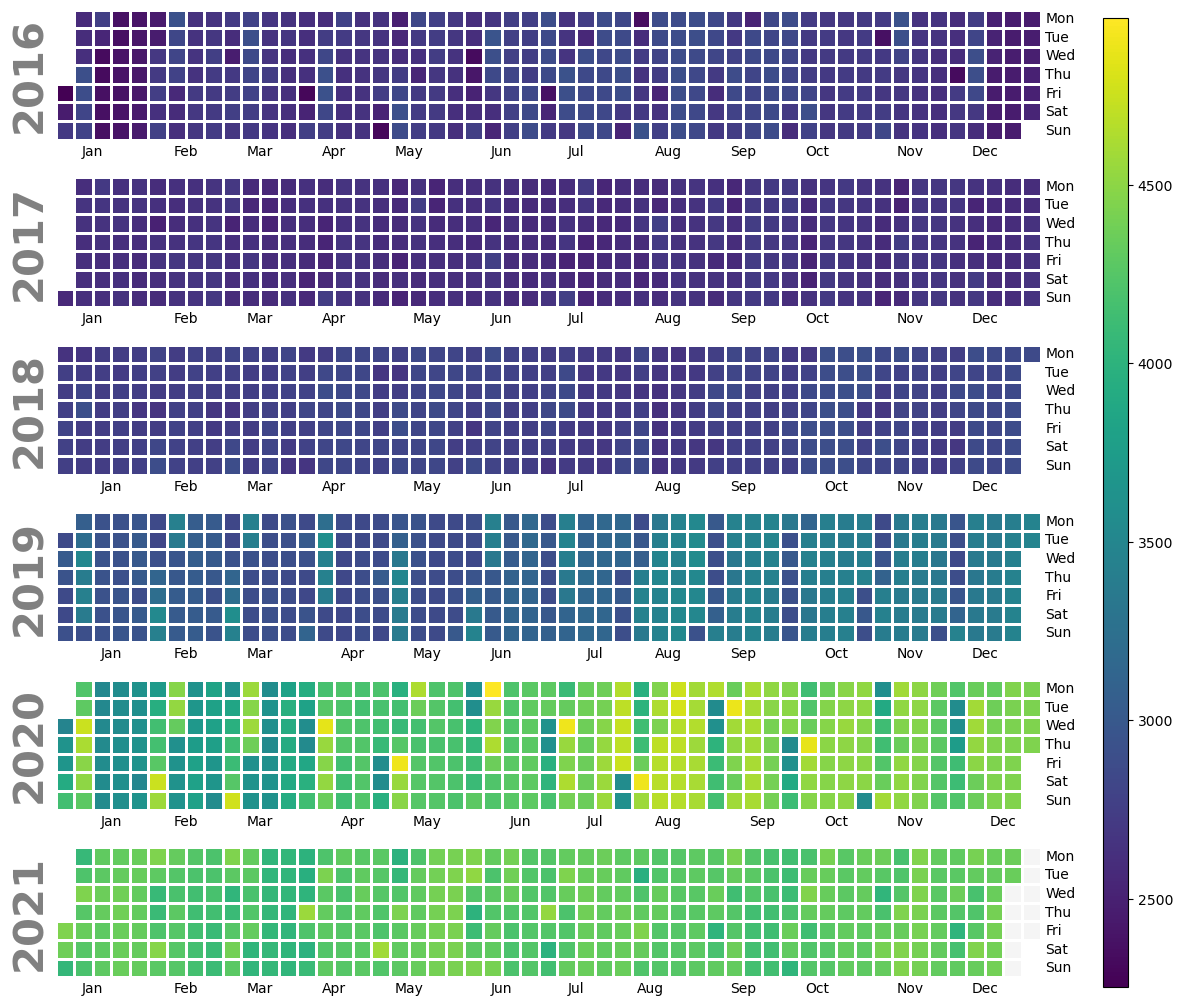

In [10]:
import calplot
calplot.calplot(df['price'],edgecolor = None, yearlabel_kws={'fontname':'sans-serif'})

## EDA 

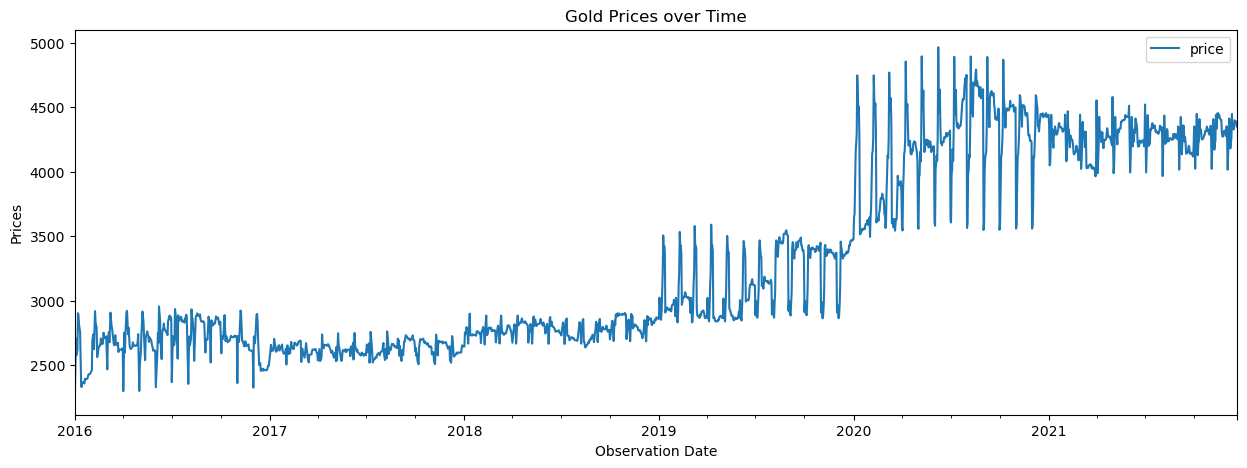

In [11]:
df.plot(figsize = (15,5))
plt.xlabel("Observation Date")
plt.ylabel("Prices")
plt.title("Gold Prices over Time")
plt.show()

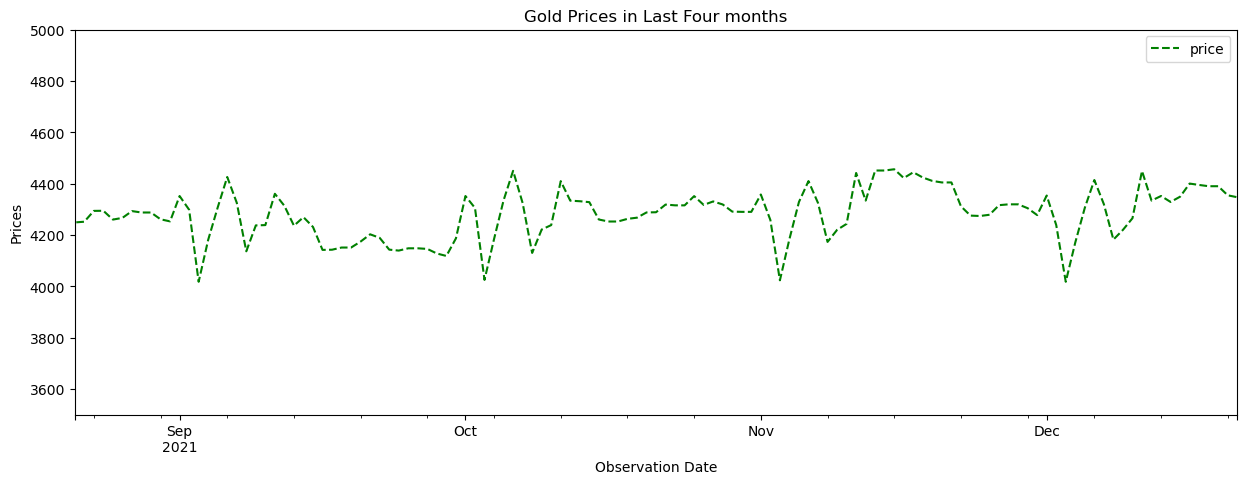

In [12]:
df.plot(xlim = ['2021-08-21','2021-12-21'],ls='--', c='g',ylim = [3500,5000],figsize = (15,5))
plt.xlabel("Observation Date")
plt.ylabel("Prices")
plt.title("Gold Prices in Last Four months")
plt.show()

In [13]:
last_4month_index = df.loc['2021-08-21':'2021-12-21'].index
last_4month_price = df.loc['2021-08-21':'2021-12-21']['price']

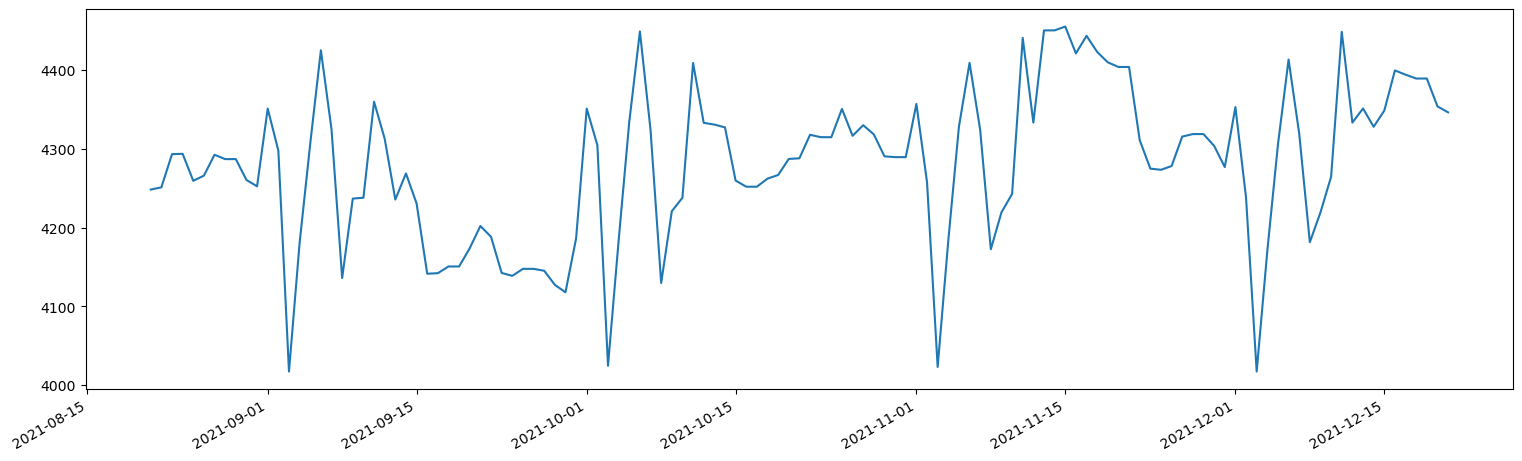

In [14]:
figure,ax = plt.subplots(figsize = (15,5))
plt.tight_layout()
figure.autofmt_xdate()
ax.plot(last_4month_index,last_4month_price)
plt.show()

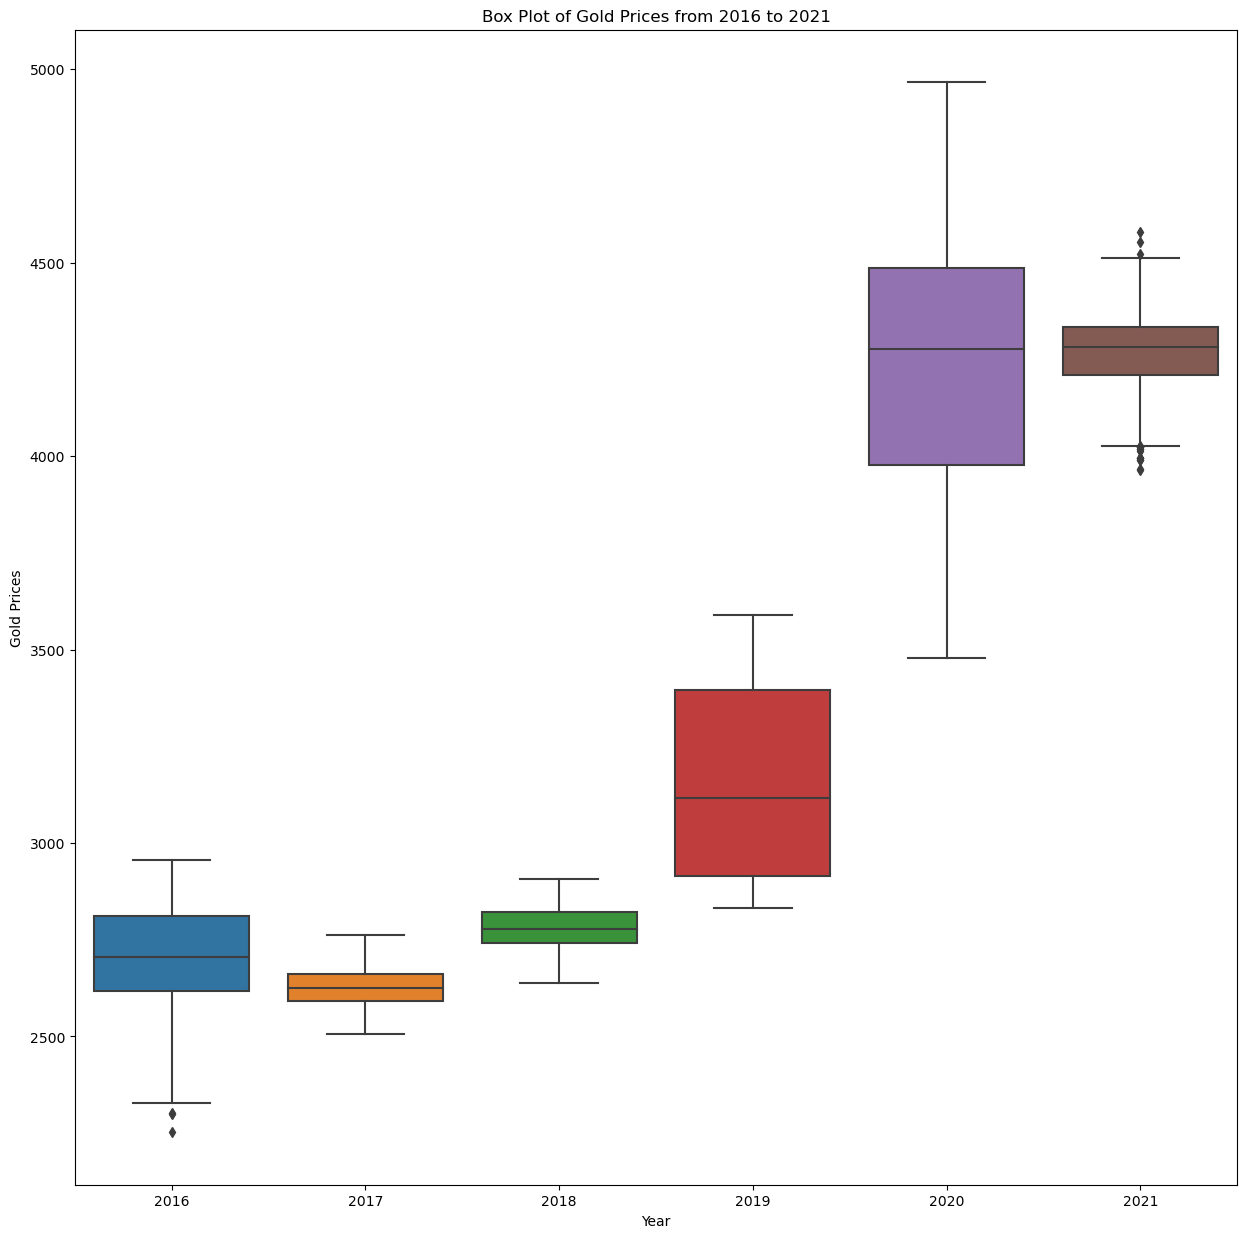

In [15]:
_,ax = plt.subplots(figsize=(15,15))
sns.boxplot(x=df.index.year, y = df.price,ax=ax)
plt.title("Box Plot of Gold Prices from 2016 to 2021")
plt.xlabel("Year")
plt.ylabel("Gold Prices")
plt.show()

## Resampling the Data 

+ Annual Fluction for maximum, minimum and mean gold price

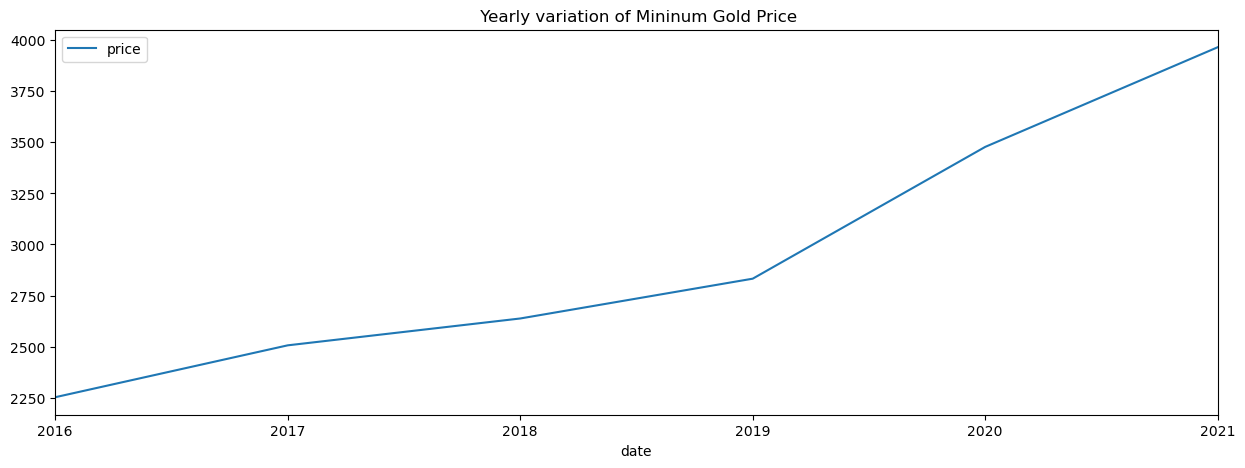

In [16]:
df.resample('A').min().plot(figsize=(15,5))
plt.title(" Yearly variation of Mininum Gold Price")
plt.show()

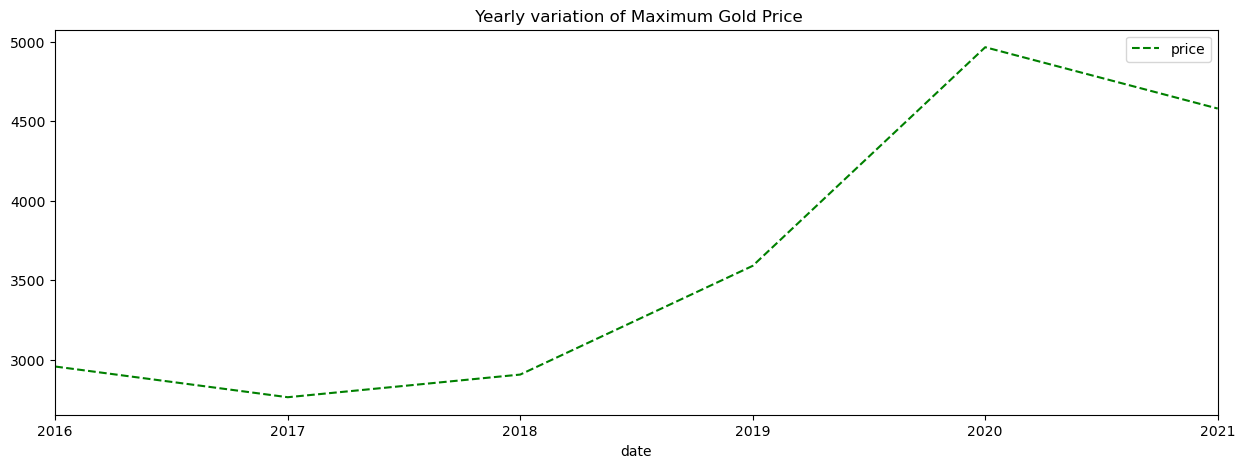

In [17]:
df.resample('A').max().plot(figsize=(15,5),ls='--',c='g')
plt.title(" Yearly variation of Maximum Gold Price")
plt.show()

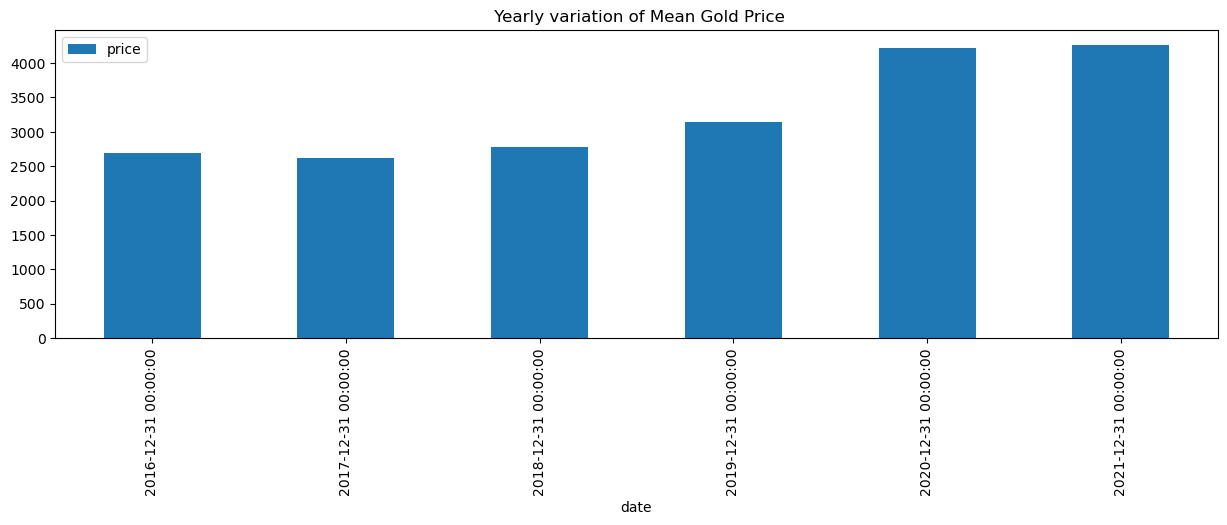

In [18]:
df.resample('A').mean().plot(figsize=(15,4),kind = 'bar')
plt.title(" Yearly variation of Mean Gold Price")
plt.show()

+ Variation minimum, maximum, mean gold price at Quarter start

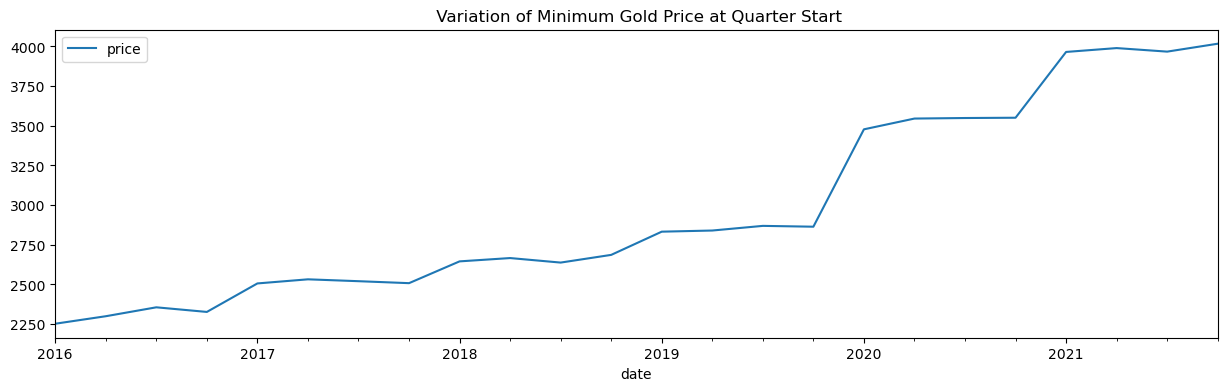

In [19]:
df.resample('Qs').min().plot(figsize=(15,4))
plt.title(" Variation of Minimum Gold Price at Quarter Start")
plt.show()

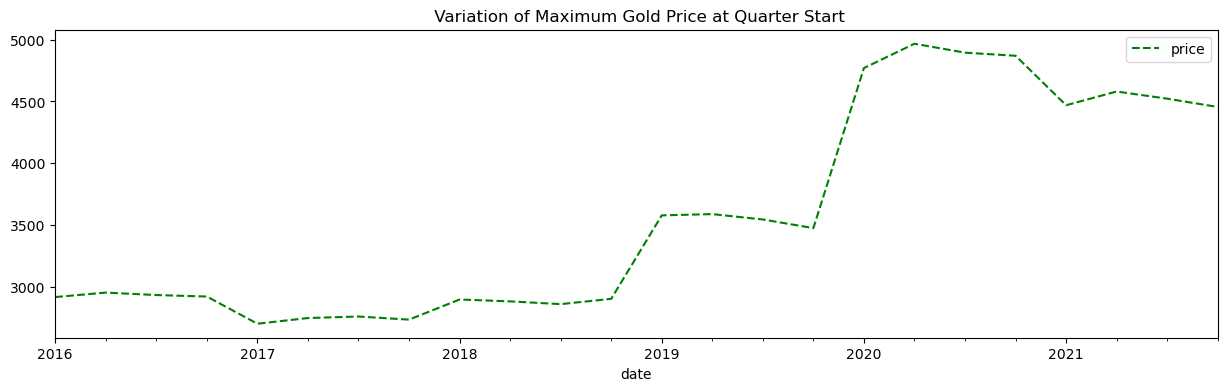

In [20]:
df.resample('Qs').max().plot(figsize=(15,4),ls='--',c='g')
plt.title(" Variation of Maximum Gold Price at Quarter Start")
plt.show()

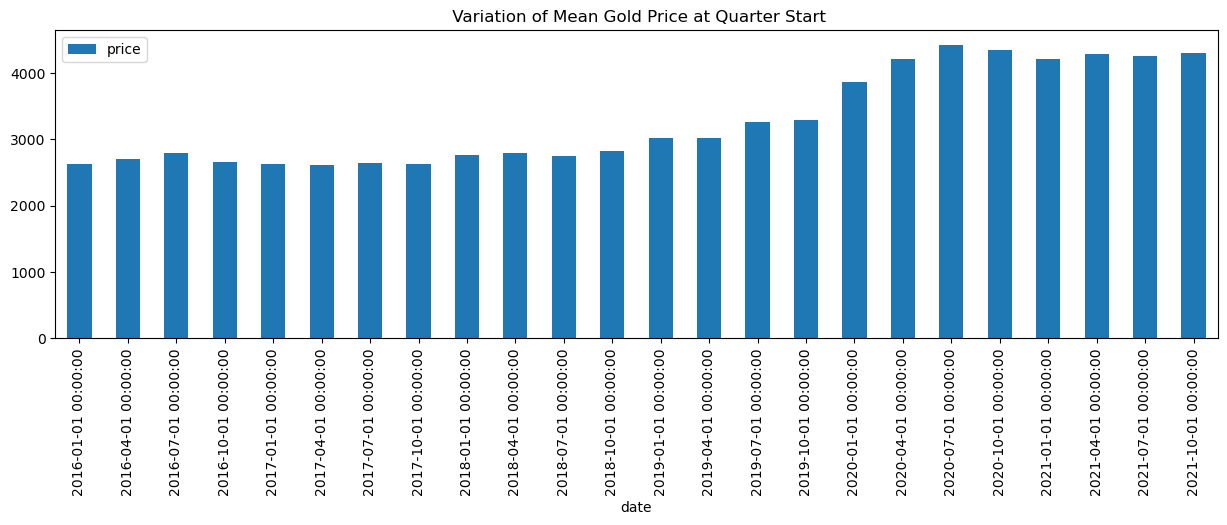

In [21]:
df.resample('Qs').mean().plot(figsize=(15,4),kind = 'bar')
plt.title(" Variation of Mean Gold Price at Quarter Start")
plt.show()

## Minimum, maximum and mean Gold price for month end

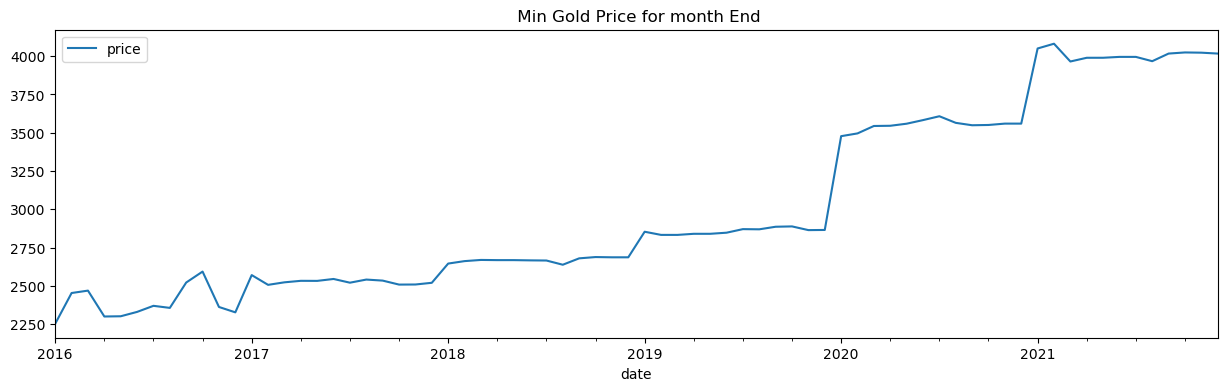

In [22]:
df.resample('M').min().plot(figsize=(15,4))
plt.title(" Min Gold Price for month End")
plt.show()

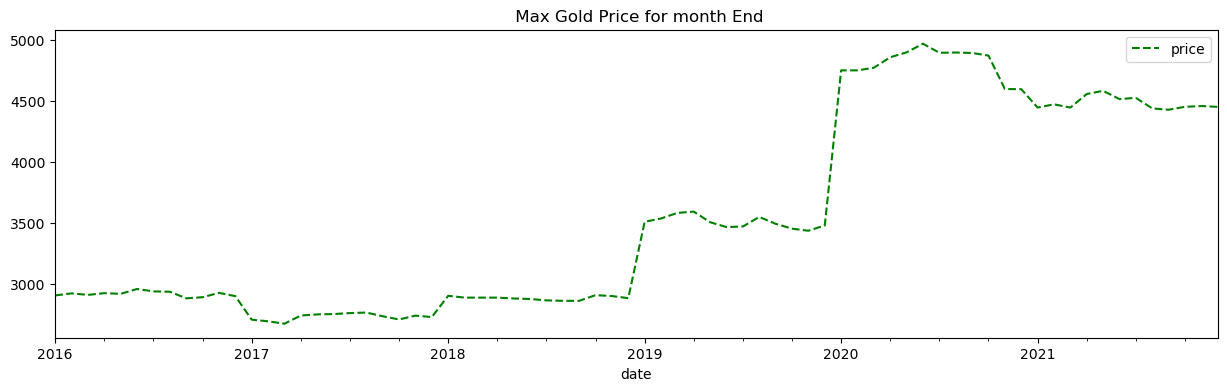

In [23]:
df.resample('M').max().plot(figsize=(15,4),ls='--',c='g')
plt.title(" Max Gold Price for month End")
plt.show()

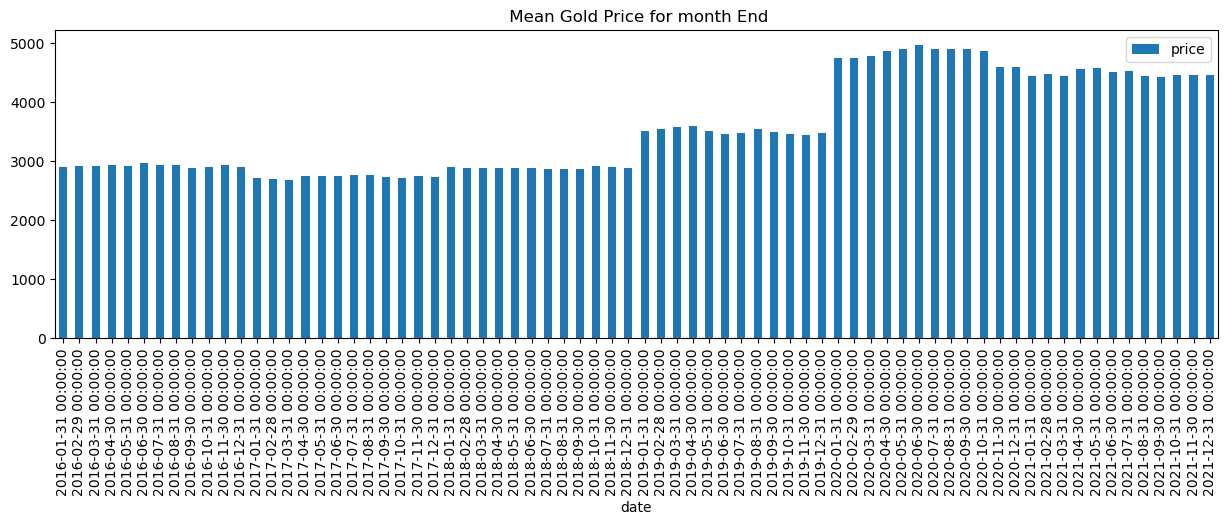

In [24]:
df.resample('M').max().plot(figsize=(15,4),kind = 'bar')
plt.title(" Mean Gold Price for month End")
plt.show()

## Weekly Box Plot

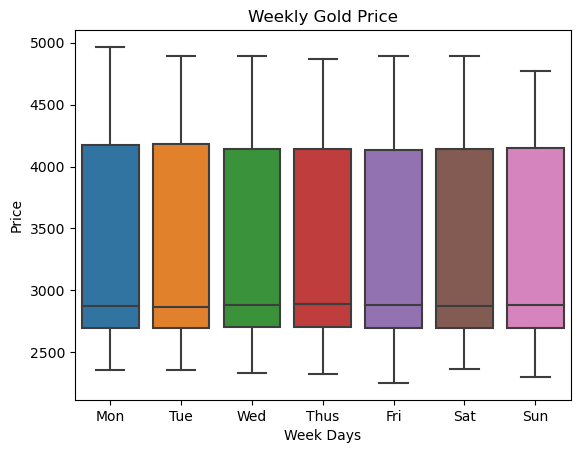

In [25]:
df3= df.copy()
df3['weekday'] = df3.index.weekday
sns.boxplot(data = df3, x='weekday',y='price')
plt.xlabel("Week Days")
plt.ylabel("Price")
plt.title("Weekly Gold Price")
plt.xticks([0,1,2,3,4,5,6],labels=['Mon','Tue','Wed','Thus','Fri','Sat','Sun'])
plt.show()

In [26]:
df2 = df.copy()
df2['TDMin'] = df2['price'].rolling(30).min() # Thirty day min price rolling
df2.tail(5)

,price,TDMin
date,,
2021-12-17,4394.4,4017.1
2021-12-18,4389.5,4017.1
2021-12-19,4389.5,4017.1
2021-12-20,4354.1,4017.1
2021-12-21,4346.5,4017.1


In [27]:
df2['TDMax']= df2['price'].rolling(30).max() # thirty day maximum price rolling
df2.tail()

,price,TDMin,TDMax
date,,,
2021-12-17,4394.4,4017.1,4448.9
2021-12-18,4389.5,4017.1,4448.9
2021-12-19,4389.5,4017.1,4448.9
2021-12-20,4354.1,4017.1,4448.9
2021-12-21,4346.5,4017.1,4448.9


In [28]:
df2['TDMean']= df2['price'].rolling(30).mean() # thirty day mean price rolling
df2.tail()

,price,TDMin,TDMax,TDMean
date,,,,
2021-12-17,4394.4,4017.1,4448.9,4313.400000
2021-12-18,4389.5,4017.1,4448.9,4312.273333
2021-12-19,4389.5,4017.1,4448.9,4311.586667
2021-12-20,4354.1,4017.1,4448.9,4309.916667
2021-12-21,4346.5,4017.1,4448.9,4307.993333


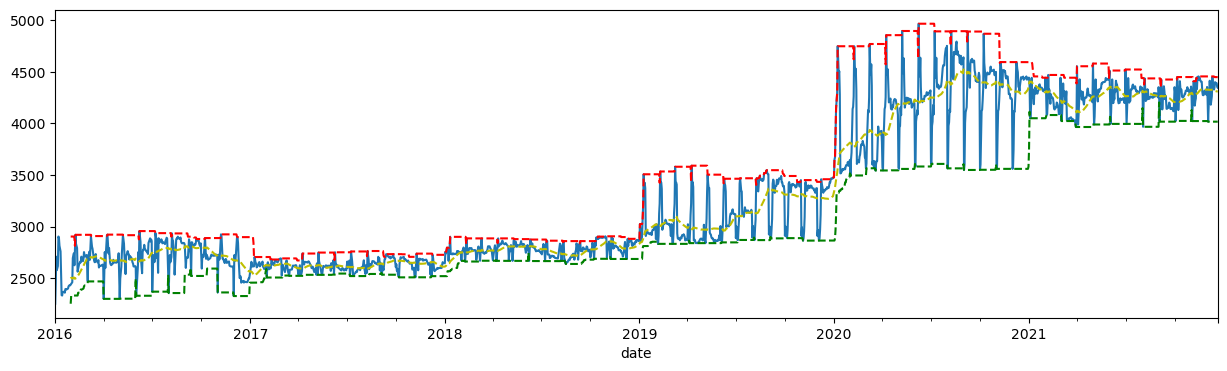

In [29]:
plt.figure(figsize=(15,4))
df2['price'].plot()
df2['TDMax'].plot(ls='--',c='r')
df2['TDMin'].plot(ls='--',c='g')
df2['TDMean'].plot(ls='--',c='y')
plt.show()

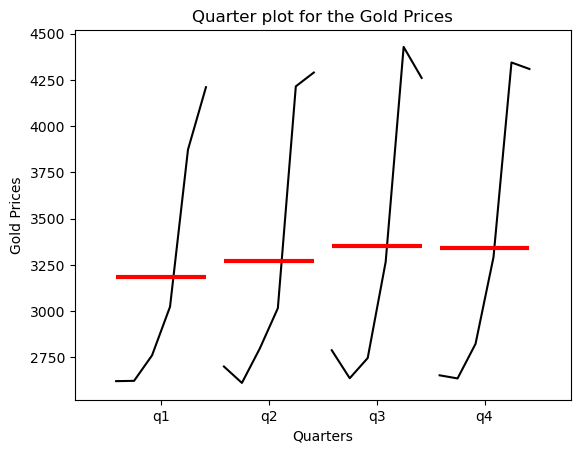

In [30]:
from statsmodels.graphics.tsaplots import quarter_plot
df_quarterly_gold_price = df.resample('Q').mean()
quarter_plot(df_quarterly_gold_price)
plt.title("Quarter plot for the Gold Prices")
plt.xlabel("Quarters")
plt.ylabel("Gold Prices")
plt.show()

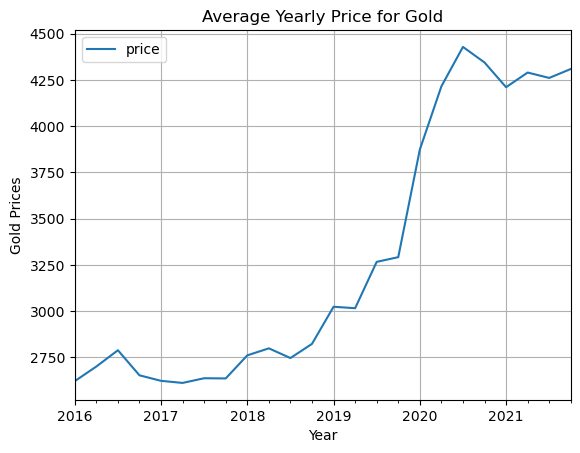

In [31]:
df_yearly_gold_price = df.resample('A').mean()
df_quarterly_gold_price.plot()
plt.title("Average Yearly Price for Gold")
plt.xlabel("Year")
plt.ylabel("Gold Prices")
plt.grid()

### ETS(Error-Trend-Seasonality) decomposition of the data

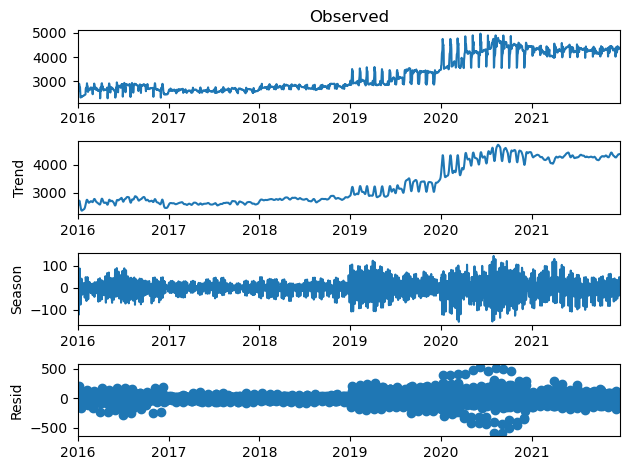

In [32]:
df = STL(df).fit()
df.plot()
plt.show()